In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
my_data=pd.read_csv('all_data_filtered.csv')
my_data.head(10)
my_data.index=my_data['Patient_id']
my_data=my_data.drop(['Patient_id'],axis=1)
my_data.head()
y=my_data['MRD Response']
X=my_data.drop(['MRD Response'],axis=1)

In [3]:
CorrPatients=np.corrcoef(X)

In [3]:
CorrGenes=np.corrcoef(X.T)

/home/irit/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/irit/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: >

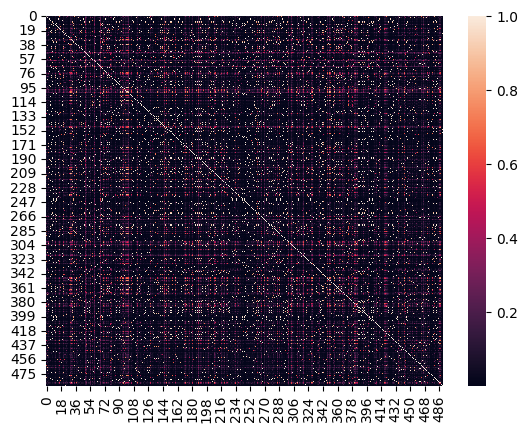

In [5]:
sns.heatmap(CorrPatients)

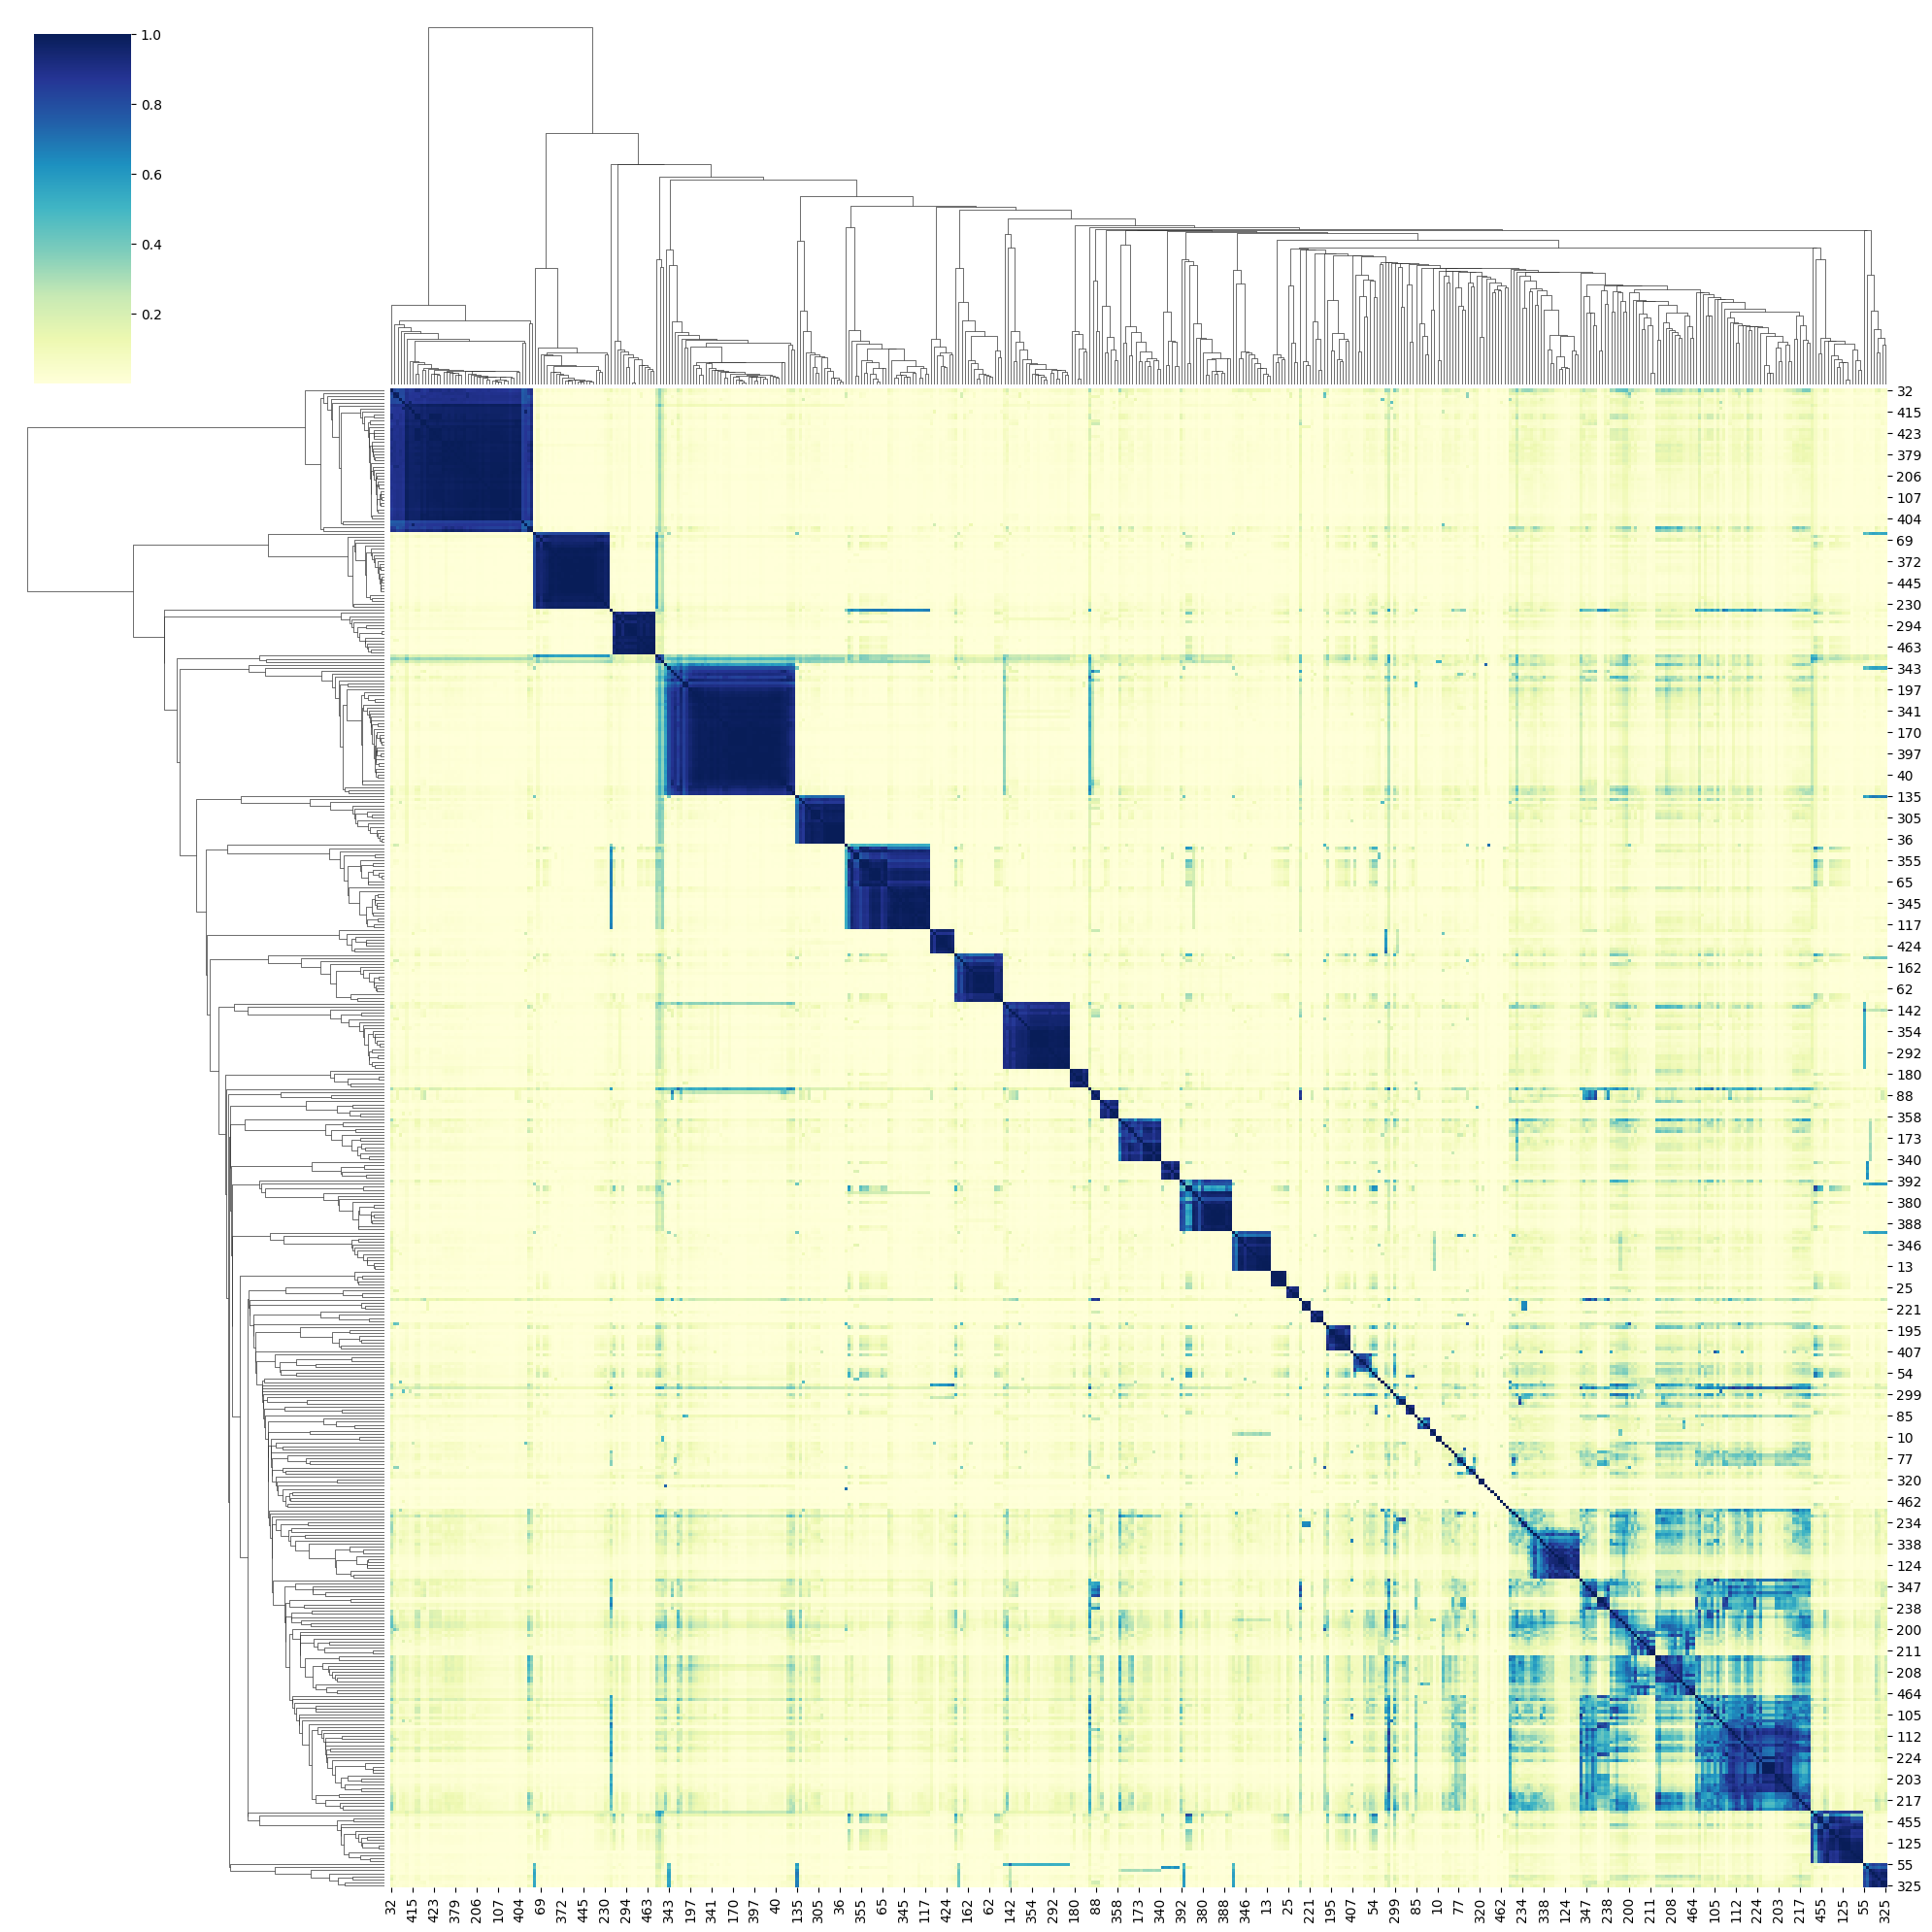

In [7]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

# Mesure de dissimilarité
Dissim_Data= np.sqrt((1 - np.abs(CorrPatients))**2)
# correlation en array
correlations_array = np.asarray(CorrPatients)
row_linkage = hierarchy.linkage(
    distance.pdist(Dissim_Data), method='single')
col_linkage = hierarchy.linkage(
    distance.pdist(Dissim_Data.T), method='single')
cl=sns.clustermap(correlations_array, row_linkage=row_linkage, col_linkage=col_linkage, method="single",figsize=(20, 20), cmap="YlGnBu")
cl.savefig('CorrelationClusteringFull.pdf') 

In [9]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

# Mesure de dissimilarité
Dissim_Data= np.sqrt((1 - np.abs(CorrPatients))**2)
# correlation en array
correlations_array = np.asarray(CorrPatients)
row_linkage = hierarchy.linkage(
    distance.cosine(X,X), method='single')
col_linkage = hierarchy.linkage(
    distance.cosine(X,X), method='single')
cl=sns.clustermap(X, row_linkage=row_linkage, col_linkage=col_linkage, method="single",figsize=(20, 20), cmap="YlGnBu")
cl.savefig('CorrelationClusteringFull.pdf') 

ValueError: Input vector should be 1-D.

(array([8.69400000e+03, 2.61888400e+06, 1.28721621e+09, 1.12902779e+09,
        3.20461214e+08, 1.07338110e+08, 4.10076500e+07, 1.33017840e+07,
        2.32911800e+06, 7.14871000e+05]),
 array([-0.3946767 , -0.25520903, -0.11574136,  0.02372631,  0.16319398,
         0.30266165,  0.44212932,  0.58159699,  0.72106466,  0.86053233,
         1.        ]),
 <BarContainer object of 10 artists>)

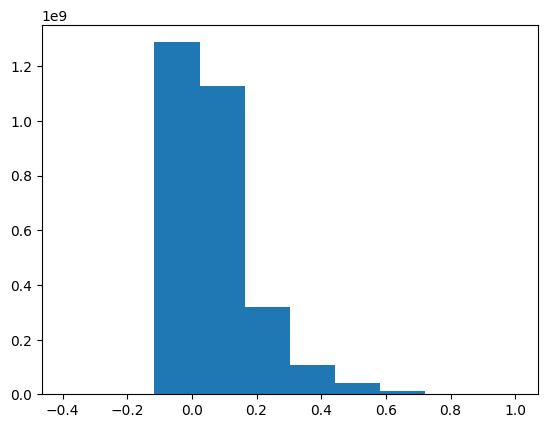

: 

In [7]:
y=plt.hist(CorrGenes.ravel())